# Introduction to Data

## Getting started

There are basically three options to run the codes in this tutorial:

1. Copy-Paste the codes from the website and run the codes line-by-line on your own computer with your preferred IDE (Jupyter Lab, Spyder, PyCharm etc.).
2. Download this Notebook (see below) and run it using Jupyter Lab which you should have installed by following the [installation instructions](https://otesama2023.readthedocs.io/en/latest/info/installing-miniconda.html).
3. Run the codes using Binder (see below) which is the easiest way, but has very limited computational resources (i.e. can be very slow).


### Download the Notebook

You can download this tutorial Notebook to your own computer by clicking the **Download button** from the Menu on the top-right section of the website. 

- Right-click the option that says `.ipynb` and choose **"Save link as .."**

![Download tutorial Notebook.](img/Download_notebook_button.png)

### Run the codes on your own computer

Before you can run this Notebook, and/or do any programming, you need to launch the Jupyter Lab programming environment. The JupyterLab comes with the environment that you installed earlier (if you have not done this yet, follow the [installation instructions](https://otesama2023.readthedocs.io/en/latest/info/installing-miniconda.html)). To run the JupyterLab:

1. Using terminal/command prompt, navigate to the folder where you have downloaded the Jupyter Notebook tutorial: `$ cd /mydirectory/`
2. Activate the programming environment: `$ conda activate geo`
3. Launch the JupyterLab: `$ jupyter lab`

After these steps, the JupyterLab interface should open, and you can start executing cells (see hints below at "Working with Jupyter Notebooks").

#### Alternatively: Run codes in Binder (with limited resources)

Alternatively (not recommended due to limited computational resources), you can run this Notebook by launching a Binder instance. You can find buttons for activating the python environment at the top-right of this page which look like this:

![Launch Binder](img/launch_binder.png)

### Working with Jupyter Notebooks

Jupyter Notebooks are documents that can be used and run inside the JupyterLab programming environment containing the computer code and rich text elements (such as text, figures, tables, and links). 

**A couple of hints**:

- You can **execute a cell** by clicking a given cell that you want to run and pressing <kbd>Shift</kbd> + <kbd>Enter</kbd> (or by clicking the "Play" button on top)
- You can **change the cell-type** between `Markdown` (for writing text) and `Code` (for writing/executing code) from the dropdown menu above. 

See **further details and help for** [**using Notebooks and JupyterLab from here**](https://pythongis.org/part1/chapter-01/nb/04-using-jupyterlab.html). 

**Lesson objectives**

This tutorial focuses on how to work with various geospatial data to construct a **spatial networks** and learn how to construct a routable **directed** graph for Networkx and find shortest paths along the given street network based on travel times or distance by car using **R5py**.  In addition, we will learn about the relevant data to calculate GHG emissions for different travel modes of commutating among multiple origin-destination zones simultaneously.  

## Data requirements

### Data for creating a routable network

**R5py** is a Python library for routing and calculating travel time matrices on multimodal transport networks (walk, bike, public transport and car).
It provides a simple and friendly interface to R<sup>5</sup> (*the Rapid Realistic Routing on Real-world and Reimagined networks*) which is a [routing engine](https://github.com/conveyal/r5) developed by [Conveyal](https://conveyal.com/). `R5py` is designed to interact with [GeoPandas](https://geopandas.org) GeoDataFrames, and it is inspired by [r5r](https://ipeagit.github.io/r5r) which is a similar wrapper developed for R. `R5py` exposes some of R5’s functionality via its [Python API](reference.html), in a syntax similar to r5r’s. At the time of this writing, only the computation of travel time matrices has been fully implemented. Over time, `r5py` will be expanded to incorporate other functionalities from R5.
When calculating travel times with `r5py`, you typically need a couple of datasets: 

- **A road network dataset from OpenStreetMap** (OSM) in Protocolbuffer Binary (`.pbf`) -format: 
  - This data is used for finding the fastest routes and calculating the travel times based on walking, cycling and driving. In addition, this data is used for walking/cycling legs between stops when routing with transit. 
  - *Hint*: Sometimes you might need modify the OSM data beforehand, e.g. by cropping the data or adding special costs for travelling (e.g. for considering slope when cycling/walking). When doing this, you should follow the instructions at [Conveyal website](https://docs.conveyal.com/prepare-inputs#preparing-the-osm-data). For adding customized costs for pedestrian and cycling analyses, see [this repository](https://github.com/RSGInc/ladot_analysis_dataprep).

- **A transit schedule dataset** in General Transit Feed Specification (GTFS.zip) -format (optional):
   - This data contains all the necessary information for calculating travel times based on public transport, such as stops, routes, trips and the schedules when the vehicles are passing a specific stop. You can read about [GTFS standard from here](https://developers.google.com/transit/gtfs/reference).
   - *Hint*: `r5py` can also combine multiple GTFS files, as sometimes you might have different GTFS feeds representing e.g. the bus and metro connections. 

#### Where to get these datasets?

Here are a few places from where you can download the datasets for creating the routable network:

- **OpenStreetMap data in PBF-format**:

  - [pyrosm](https://pyrosm.readthedocs.io/en/latest/basics.html#protobuf-file-what-is-it-and-how-to-get-one)  -library. Allows downloading data directly from Python (based on GeoFabrik and BBBike).
  - [pydriosm](https://pydriosm.readthedocs.io/en/latest/quick-start.html#download-data) -library. Allows downloading data directly from Python (based on GeoFabrik and BBBike).
  - [GeoFabrik](http://download.geofabrik.de/) -website. Has data extracts for many pre-defined areas (countries, regions, etc).
  - [BBBike](https://download.bbbike.org/osm/bbbike/) -website. Has data extracts readily available for many cities across the world. Also supports downloading data by [specifying your own area or interest](https://extract.bbbike.org/).
  - [Protomaps](https://protomaps.com/downloads/osm) -website. Allows to download the data with custom extent by specifying your own area of interest.


- **GTFS data**:  
  - [Transitfeeds](https://transitfeeds.com/) -website. Easy to navigate and find GTFS data for different countries and cities. Includes current and historical GTFS data. Notice: The site will be depracated in the future.  
  - [Mobility Database](https://database.mobilitydata.org) -website. Will eventually replace TransitFeeds -website. 
  - [Transitland](https://www.transit.land/operators) -website. Find data based on country, operator or feed name. Includes current and historical GTFS data.

### Data for origin and destination locations (H3 hexagonal grid)

In addition to OSM and GTFS datasets, you need data that represents the origin and destination locations (OD-data) for routings and understanding the number of people travelling between them. This data is typically stored in one of the geospatial data formats, such as Shapefile, GeoJSON or GeoPackage. In the workshop tutorials, we are using H3 hexagonal grid data at resolution 9 to represent the origin-destination locations (scroll down for further details with code):

![H3 data sample](img/H3-resolutions.png)

### Travel demand: Mobile Phone Data

To understand the travel demand in a given city (i.e. how many people travel between given locations), you need to have some data that is able to provide that information. Traditionally travel surveys and statistics have been used for this purpose, but in this workshop we are using mobile phone data from a company called Locomizer to extract information about the travel demand in Helsinki Region. Locomizer data is aggregated and anonymized into H3 hexagons and it reveals the number of users that travel from a given origin hexagon to a given destination hexagon at a specific day and hour (i.e. revealing Origin-destination flows in the city). 

In this tutorial, we share you aggregated mobility data that represents the OD-flows in Helsinki Region at H9-resolution during a regular Thursday recorded between April 15th to May 15th 2023:

![Locomizer sample](img/OD-flows.png)

    
### Data for GHG emission factors

The [International Transport Forum (ITF)](https://www.itf-oecd.org/) has developed a comprehensive life-cycle analysis [Excel-based tool](data/life-cycle-assessment-calculations-2020.xlsx) of urban transport modes including new mobility services, such as shared vehicles and ridesourcing. The Excel-based tool (provide the link?) includes calculations and assumptions made for the ITF report titled as "Good to go? Assessing the environmental performance of new mobility in cities". 
- **Sources**:
    - Cazzola, P. and Crist, P., 2020. [Good to go? Assessing the environmental performance of new mobility](https://www.itf-oecd.org/good-go-assessing-environmental-performance-new-mobility)
    - [The electricity generation mix of Finland in 2020.](https://www.iea.org/countries/finland)

From these sources, a CSV file named ["LCA_gCO2_per_pkm_by_transport_mode.csv"](data/LCA_gCO2_per_pkm_by_transport_mode.csv) is created, consisting of GHG emissions per passenger-kilometer (g CO<sub>2</sub>/pkm) by transport modes derived from the mentioned LCA tool by ITF. The columns represent the different transport modes and the rows represent the GHG emissions. The GHG emissions of the transport modes have been divided into four separate components: vehicle component, fuel component, infrastructure component and operational services. The explanations of the acronyms (in the transport modes names) are: BEV = battery electric vehicle; HEV = hybrid electric vehicle; ICE = internal combustion engine; FCEV = fuel cell electric vehicle; PHEV = plug-in hybrid electric vehicle. 



## Helsinki Regional Transport Authority (HSL) survey data
The Helsinki Regional Transport Authority (Finnish: Helsingin seudun liikenne, HSL; Swedish: Helsingforsregionens trafik, HRT) is the inter-municipal body responsible for maintaining the public transportation network across the nine municipalities of Greater Helsinki, Finland.

HSL oversees the operation of Helsinki's entire public transportation system, which includes local buses, trams, metro trains, ferries, commuter trains, and bikeshare services. According to an HSL survey on the number of trips, residents of the Helsinki region aged seven and above made a total of 4.6 million trips on a typical weekday in the fall of 2023. The detailed report can be found [here](data/lt23-kulkutapajakaumat-hsl-nettisivuille.pdf).

Based on the modality of travel choice and different percentages of various weekday trips of residents of the Helsinki region in autumn 2023, the survey report contains the following ratio of travel mode share in the HSL-alue yhteensä (i.e. total HSL area):

In [1]:
Car_share_Hsl = 0.35 ## Car
PT_share_Hsl = 0.23 ## Public transport
Bike_share_Hsl = 0.08  ## Bicycle
Walk_share_Hsl = 0.33  ## Walking
Other_share_Hsl = 0.01 ## Other

This data can be used to split the travellers among OD hexagon pairs accordingly to calculate more representative CO2 emissions for given origin-destination pairs. 

## Introduction to H3 Hexagonal Hierarchical Geospatial Indexing System

In this tutorial, first, we will learn how to work with Uber's H3 Hexagonal Hierarchical Geospatial Indexing System in Python. We will utilize the geographical data around the city center area of Helsinki, Finland. 

In [2]:
# A point of interest (poi) at the Helsinki Central Location
from shapely.geometry import Point 
import osmnx as ox
import geopandas as gpd

# Geocode a specific place in Helsinki
address = "Scandic Hub, Helsinki" 
lat, lon = ox.geocode(address)

# Create a GeoDataFrame out of the coordinates
poi = gpd.GeoDataFrame({"geometry": [Point(lon, lat)], "name": "Scandic Hub, Helsinki", "id": [0]}, index=[0], crs="epsg:4326")
# plotting the poi
poi.explore(max_zoom=13, color="red", marker_kwds={"radius": 12})

We can select a set of neighbouring hexagon cells of resolution 9 from the centre of Helsinki. This can be achieved by the following function. Details can be found [here](https://h3geo.org/docs/3.x/). The syntaxes used in this tutorial work for the h3 version v3.7.7.

In [3]:
import shapely
import h3
import matplotlib.pyplot as plt

# h3 hexagons are to be created at a specified resolution from 1-10 
resolution = 9

# We can indicate the number of hexagonal rings around the central hexagon
ring_size = 6

# Get the H3 hexagons covering the central Helsinki 
center_h3 = h3.geo_to_h3(lat, lon, resolution) 
hexagons = list(h3.k_ring(center_h3, ring_size))  # Convert the set to a list

In [4]:
# Create a GeoDataFrame with hexagons and their corresponding geometries
hexagon_geometries = [shapely.geometry.Polygon(h3.h3_to_geo_boundary(hexagon, geo_json=True)) for hexagon in hexagons]
hexagon_df = gpd.GeoDataFrame({'Hexagon_ID': hexagons, 'geometry': hexagon_geometries},crs="epsg:4326")
#hexagon_df.explore()

In [5]:
## Create a column of centroids and make them as point geometry
hexagon_df["H3_centroids"] = hexagon_df.Hexagon_ID.apply(lambda x: Point(h3.h3_to_geo(str(x))))
hexagon_df.head()

,Hexagon_ID,geometry,H3_centroids
0,891126d3397ffff,"POLYGON ((24.92704 60.17126, 24.92973 60.17057...",POINT (60.17227604844199 24.929499715958208)
1,891126d322fffff,"POLYGON ((24.94227 60.15421, 24.94496 60.15352...",POINT (60.15521837639684 24.944728818026114)
2,891126d32a3ffff,"POLYGON ((24.92396 60.15563, 24.92664 60.15494...",POINT (60.156642821084354 24.926409550192375)
3,891126d14a7ffff,"POLYGON ((24.96215 60.16060, 24.96483 60.15991...",POINT (60.16160881879764 24.964603523430327)
4,891126d3357ffff,"POLYGON ((24.94382 60.16202, 24.94650 60.16133...",POINT (60.163035534643534 24.946277954619735)


## Load and prepare the origin and destination data
We will use a pair of these hexagons as origin and destinations to understand the travel patterns of commuters and Green House Gas (GHG) emissions of individual users due to different modes of transport. For this tutorial, we will use a sample of H3 hexagons that correspond with the Locomizer data at resolution 9 in the Helsinki region.

### Reading the Locomizer data
Let's start by understanding a sample of the Locomizer dataset into a pandas `DataFrame` that we can use as origin-destination hexagons that contain the number of users travelled in between. 

In [105]:
import pandas as pd
import shapely

# Reading the OD data
data = pd.read_csv("data/Locomizer_data/Locomizer_Valid_OD_Hexes_filtered.csv",index_col=0)

data.head()

,destination_code_level_9,origin_code_level_9,NUMBER_OF_USERS,DWELL_TIME,EXTRAPOLATED_NUMBER_OF_USERS,NUMBER_OF_SIGNALS,EXTRAPOLATED_NUMBER_OF_SIGNALS,PROPORTION_OF_USERS,NAMEFIN
0,890899695b3ffff,89089961267ffff,0.666667,5.487959,92.888889,7.444444,935.555556,5.026455,Helsinki
1,8908996800bffff,89089968003ffff,3.666667,3.687860,362.555556,5.222222,509.666667,9.801587,Helsinki
2,8908996800fffff,89089968003ffff,0.666667,2.012012,71.000000,0.888889,92.222222,1.014911,Helsinki
3,8908996801bffff,89089968003ffff,0.666667,2.665467,79.111111,1.222222,154.111111,4.021164,Helsinki
4,89089968063ffff,89089968003ffff,2.000000,3.959179,235.666667,2.555556,287.888889,4.082492,Helsinki


The `loco_sample_OD` DataFrame contains a few columns, namely `origin_code_level_9`, `destination_code_level_9`, `DAY` `NUMBER_OF_USERS`, `DWELL_TIME`,  `EXTRAPOLATED_NUMBER_OF_USERS` `NUMBER_OF_SIGNALS`, `EXTRAPOLATED_NUMBER_OF_SIGNALS`, `PROPORTION_OF_USERS`, and `NAMEFIN`. We will begin with visualising origin hexagons with valid users in H3 hexagonal resolution 9.  As we can see, there is no `geometry` column with the unique boundary values of the hexagons. The origin and destination hexagon `geometry` columns are required for defining the hexagonal boundaries to work. 

Hence, we have to create the hexagonal geometries as below:  

In [106]:
# Name of the hex code column that we want to use for creating geometries
hex_col = "destination_code_level_9"

# Create geometries
data["geometry"] = data[hex_col].apply(lambda x: shapely.Polygon(h3.h3_to_geo_boundary(x, geo_json=True))) 

In [107]:
data.head()

,destination_code_level_9,origin_code_level_9,NUMBER_OF_USERS,DWELL_TIME,EXTRAPOLATED_NUMBER_OF_USERS,NUMBER_OF_SIGNALS,EXTRAPOLATED_NUMBER_OF_SIGNALS,PROPORTION_OF_USERS,NAMEFIN,geometry
0,890899695b3ffff,89089961267ffff,0.666667,5.487959,92.888889,7.444444,935.555556,5.026455,Helsinki,POLYGON ((24.718877380241732 60.16058820239154...
1,8908996800bffff,89089968003ffff,3.666667,3.687860,362.555556,5.222222,509.666667,9.801587,Helsinki,"POLYGON ((24.72557001608462 60.18673401028163,..."
2,8908996800fffff,89089968003ffff,0.666667,2.012012,71.000000,0.888889,92.222222,1.014911,Helsinki,POLYGON ((24.727778540207243 60.18944780076118...
3,8908996801bffff,89089968003ffff,0.666667,2.665467,79.111111,1.222222,154.111111,4.021164,Helsinki,POLYGON ((24.72044178952002 60.186403225409265...
4,89089968063ffff,89089968003ffff,2.000000,3.959179,235.666667,2.555556,287.888889,4.082492,Helsinki,POLYGON ((24.735827572834758 60.18739503712752...


To better understand the mobility patterns in the region, let's aggregate the movement flows and create a map that shows the number of users in the destination cells:

In [108]:
# Aggregate the OD-flows and show how many people travel to specific destinations
pop_dest = data.groupby(hex_col)["EXTRAPOLATED_NUMBER_OF_USERS"].sum().reset_index()
pop_dest.head()

,destination_code_level_9,EXTRAPOLATED_NUMBER_OF_USERS
0,890899612cbffff,352.444444
1,89089968003ffff,181.222222
2,8908996800bffff,1051.666667
3,8908996800fffff,71.000000
4,8908996801bffff,79.111111


Now we know how many users have travelled to specific destination. Next, we will create geometries (again) and turn these into a GeoDataFrame based on the H3 codes:

In [109]:
pop_dest["geometry"] = pop_dest[hex_col].apply(lambda x: shapely.Polygon(h3.h3_to_geo_boundary(x, geo_json=True)))
pop_dest = gpd.GeoDataFrame(pop_dest, crs="epsg:4326")

In [110]:
pop_dest.head()

,destination_code_level_9,EXTRAPOLATED_NUMBER_OF_USERS,geometry
0,890899612cbffff,352.444444,"POLYGON ((24.61873 60.22864, 24.62142 60.22796..."
1,89089968003ffff,181.222222,"POLYGON ((24.72265 60.18912, 24.72533 60.18843..."
2,8908996800bffff,1051.666667,"POLYGON ((24.72557 60.18673, 24.72825 60.18605..."
3,8908996800fffff,71.000000,"POLYGON ((24.72778 60.18945, 24.73046 60.18876..."
4,8908996801bffff,79.111111,"POLYGON ((24.72044 60.18640, 24.72312 60.18572..."


Finally, we can visualize the number of users at specific destination cells:

<Axes: >

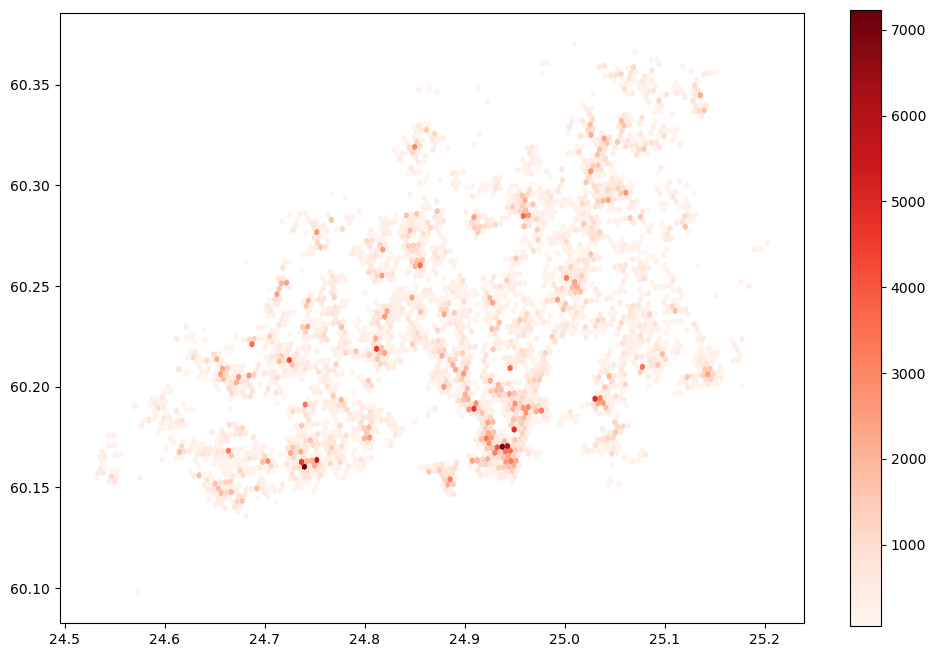

In [111]:
# Visualize destination 
pop_dest.plot(column="EXTRAPOLATED_NUMBER_OF_USERS", cmap="Reds", legend=True, figsize=(12,8))

Now we can see the areas in Helsinki Region where the highest number of users are travelling to. 

```{admonition} Exercise

Modify the above codes and produce a similar map based on the **origin** hexagons. Are the patterns similar?

```

In [112]:
# Write your solution here
# You can add new cells below if you want

### Create a simple flowmap

Take a copy of the OD-data:

In [113]:
flows = data.copy()

Next, we will create a LineString object out of the origin and destination points:

In [118]:
from shapely import LineString

# Names of the hex columns
orig_hex = "origin_code_level_9"
dest_hex = "destination_code_level_9"

# Extract the Hexagon centroids for origins and destinations
flows["origin_geom"] = flows[orig_hex].apply(lambda x: Point(list(h3.h3_to_geo(str(x)))[::-1]))
flows["destination_geom"] = flows[dest_hex].apply(lambda x: Point(list(h3.h3_to_geo(str(x)))[::-1]))

# Create a LineString geometry out of the points
flows["line_geom"] = flows.apply(lambda x: LineString([x["origin_geom"], x["destination_geom"]]), axis=1)

Create a GeoDataFrame using the line geometry as input:

In [119]:
flows = gpd.GeoDataFrame(flows, geometry="line_geom", crs="epsg:4326")
flows.head(2)

,destination_code_level_9,origin_code_level_9,NUMBER_OF_USERS,DWELL_TIME,EXTRAPOLATED_NUMBER_OF_USERS,NUMBER_OF_SIGNALS,EXTRAPOLATED_NUMBER_OF_SIGNALS,PROPORTION_OF_USERS,NAMEFIN,geometry,origin_geom,destination_geom,line_geom
0,890899695b3ffff,89089961267ffff,0.666667,5.487959,92.888889,7.444444,935.555556,5.026455,Helsinki,"POLYGON ((24.71888 60.16059, 24.72156 60.15990...",POINT (24.643168607702737 60.23880366998905),POINT (24.72132081962259 60.161602839010435),"LINESTRING (24.64317 60.23880, 24.72132 60.16160)"
1,8908996800bffff,89089968003ffff,3.666667,3.687860,362.555556,5.222222,509.666667,9.801587,Helsinki,"POLYGON ((24.72557 60.18673, 24.72825 60.18605...",POINT (24.725095460617776 60.19013190739788),POINT (24.72801569739153 60.18774882622088),"LINESTRING (24.72510 60.19013, 24.72802 60.18775)"


Now we can make a simple plot showing the origin destination flows:

<Axes: >

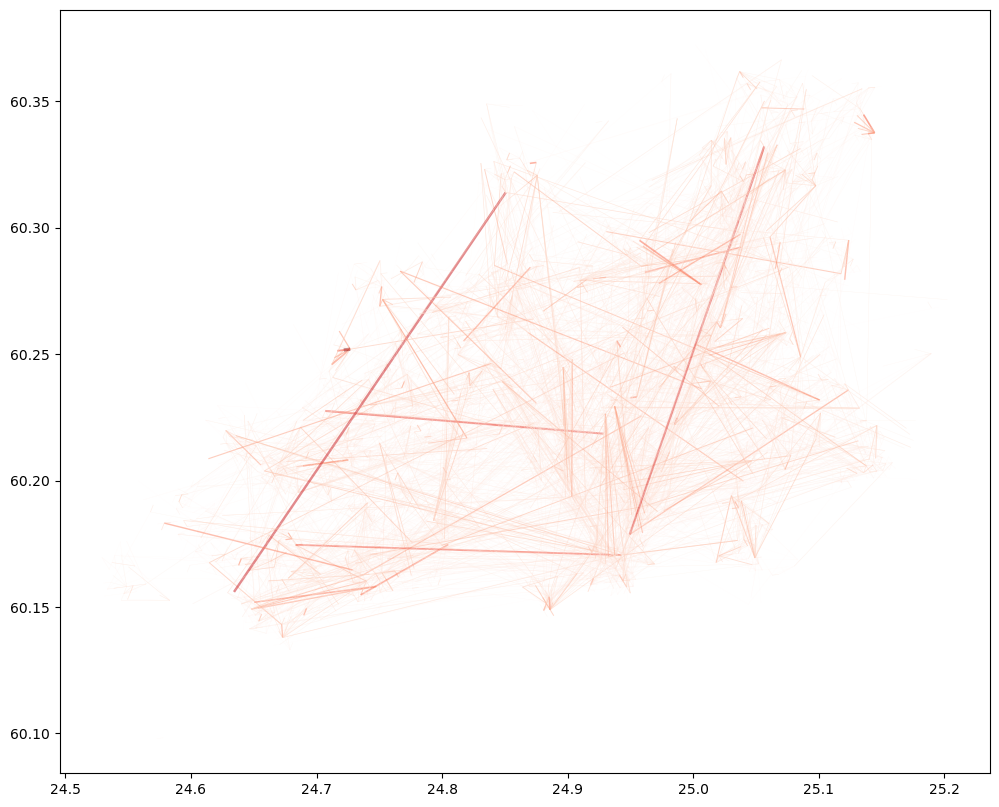

In [121]:
column = "EXTRAPOLATED_NUMBER_OF_USERS"
flows.plot(column=column, cmap="Reds", linewidth=flows[column]/1000, alpha=0.5, figsize=(12,12))

The map shows all the OD-flows in the region using Euclidian lines. The darker the color and the thicker the line, the more people have been travelling between these locations.

If you want to make a better looking map out of the flows, you can use e.g. [FlowmapBlue](https://www.flowmap.blue) or [lonboard](https://developmentseed.org/lonboard/latest/examples/migration/) which enable you to create nice interactive maps out of the flows.

## Retrieving POI data from online resources

In sustainable mobility studies, it is very typical that you want to understand how people can access specific opportunities (POIs) like education/schools, health services, and jobs. Naturally for being able to do these kind of analyses, you need to know where the services are located. Luckily, retrieving data about locations of services is quite easy in Python using libraries, such as `osmnx` or `overturemaps`. OSMnx allows you to retrieve any data that is stored in OpenStreetMap database on a global level, and `overturemaps` allows to do the same from [Overture Maps Foundation's](https://overturemaps.org) database which is maintained by big tech companies, such as Amazon, Meta, Microsoft and TomTom. 

The Overture Maps data has a higher quality compared to OSM especially for POIs which are constantly changing due to businesses emerging and closing down, as well as changing their locations. Hence, regular updates are needed. The large tech-companies are doing these updates on a regular basis (part of their business) whereas the OSM data is updated by volunteers who contribute to the OSM. For this reason, OSM tend to be slightly outdated and hence of poorer quality.

In the following, we show how you can retrieve OvertureMaps data using Python. Let's start by finding the boundaries for the area that we are interested in using `osmnx`:

<Axes: >

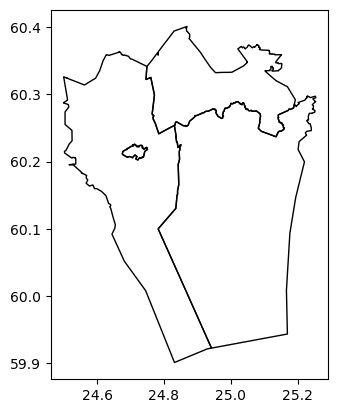

In [18]:
import osmnx as ox
import overturemaps
import shapely
import geopandas as gpd

# Area of Interest (the cities covering the Helsinki Region)
query = ["Helsinki", "Espoo", "Vantaa", "Kauniainen"]

# Find the boundaries for given areas of interest
admin_area = ox.geocode_to_gdf(query)
admin_area.plot(facecolor="None")

Now we have the boundaries for our area of interest. In the following, we will:

- Extract the bounding box rectangle of our area of interest
- Fetch the overture maps data from the area
- Convert the WKB (Well Known Binary) formatted geometries into normal shapely objects
- Create a GeoDataFrame out of the results that we can use for analysis and mapping

In [51]:
# Fetch the bounding box of the area 
bbox = admin_area.total_bounds.tolist()

# Fetch the data from overturemaps
table = overturemaps.record_batch_reader("place", bbox).read_all()

# Merge all chunks
table = table.combine_chunks()

# Convert Arrow Table into a DataFrame
df = table.to_pandas()

# Convert geometries from WKB format to normal geometries
df["geometry"] = shapely.from_wkb(df["geometry"])

# Create a GeoDataFrame out of the results
gdf = gpd.GeoDataFrame(df, crs="epsg:4326")
gdf.head()

,id,geometry,bbox,version,update_time,sources,names,categories,confidence,websites,socials,emails,phones,brand,addresses
0,08f089bb740ac48503784c44c5b8b3a2,POINT (24.51725 60.01297),"{'xmin': 24.51724624633789, 'xmax': 24.5172500...",0,2024-05-10T00:00:00.000Z,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'Bussarna', 'common': None, 'rules...","{'main': 'landmark_and_historical_building', '...",0.545360,None,[https://www.facebook.com/1308657845815075],None,None,None,"[{'freeform': None, 'locality': 'Kirkkonummi',..."
1,08f089bb74b163930370d7806b3cc3af,POINT (24.50711 60.02024),"{'xmin': 24.507104873657227, 'xmax': 24.507108...",0,2024-05-10T00:00:00.000Z,"[{'property': '', 'dataset': 'msft', 'record_i...","{'primary': 'Villa Vitsand', 'common': None, '...","{'main': 'venue_and_event_space', 'alternate':...",0.895433,[https://www.villavitsand.com/],None,None,[0405799353],None,"[{'freeform': 'Klinthällantie 132', 'locality'..."
2,08f089bb75cf63aa03cbc99ec04cdbe1,POINT (24.52478 60.02699),"{'xmin': 24.5247745513916, 'xmax': 24.52477836...",0,2024-05-10T00:00:00.000Z,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'Villa Hummerheim', 'common': None...","{'main': 'holiday_rental_home', 'alternate': [...",0.667112,[http://www.hummeripojat.fi/villa/villa_index....,[https://www.facebook.com/178985162147288],None,None,None,"[{'freeform': None, 'locality': None, 'postcod..."
3,08f089bb7080e7190355975594d33372,POINT (24.53942 60.01895),"{'xmin': 24.539419174194336, 'xmax': 24.539422...",0,2024-05-10T00:00:00.000Z,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'Mössö', 'common': None, 'rules': ...",None,0.318976,None,[https://www.facebook.com/162053340528369],None,None,None,"[{'freeform': None, 'locality': None, 'postcod..."
4,08f089bb70c55c41034b335ac6162349,POINT (24.54379 60.01303),"{'xmin': 24.543787002563477, 'xmax': 24.543790...",0,2024-05-10T00:00:00.000Z,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'Bötesören', 'common': None, 'rule...","{'main': 'landmark_and_historical_building', '...",0.667112,None,[https://www.facebook.com/1112597408814264],None,None,None,"[{'freeform': None, 'locality': 'Kirkkonummi',..."


From this table we can see that the table contains a lot of information, such as:
- the `categories` which tells us what kind of POI the given feature is (e.g. a park, hospital, library, etc.)
- the `confidence` of the existence of the place which is a number between 0 and 1. 0 means that we're sure that the place doesn't exist (anymore). 1 means that we're sure that the place exists.
- the `website` for the given POI
- the `addresses` for the place (locality, street address, etc.)

For analytical purposes, the most interesting attribute here is the `categories` which we can use to understand what kind of POIs we have at hand. This attribute is also useful because we can use it to filter specific types of services from the data (e.g. schools, hospitals). The `categories` include the main category identified for the POI as well, as alternative categories because a specific POI can belong to multiple categories at once.

In our case, we are now only interested in the `main` category of the POI. Hence, we will extract the main category from the dictionary and store it into a column `main_category`:

In [52]:
# Extract the main category from the data
gdf["main_category"] = gdf.categories.apply(lambda row: None if row is None else row["main"])
gdf.main_category.head()

0    landmark_and_historical_building
1               venue_and_event_space
2                 holiday_rental_home
3                                None
4    landmark_and_historical_building
Name: main_category, dtype: object

Now we have identified the main category and we can plot all the POIs on a map where the different colors indicate a specific category:

<Axes: >

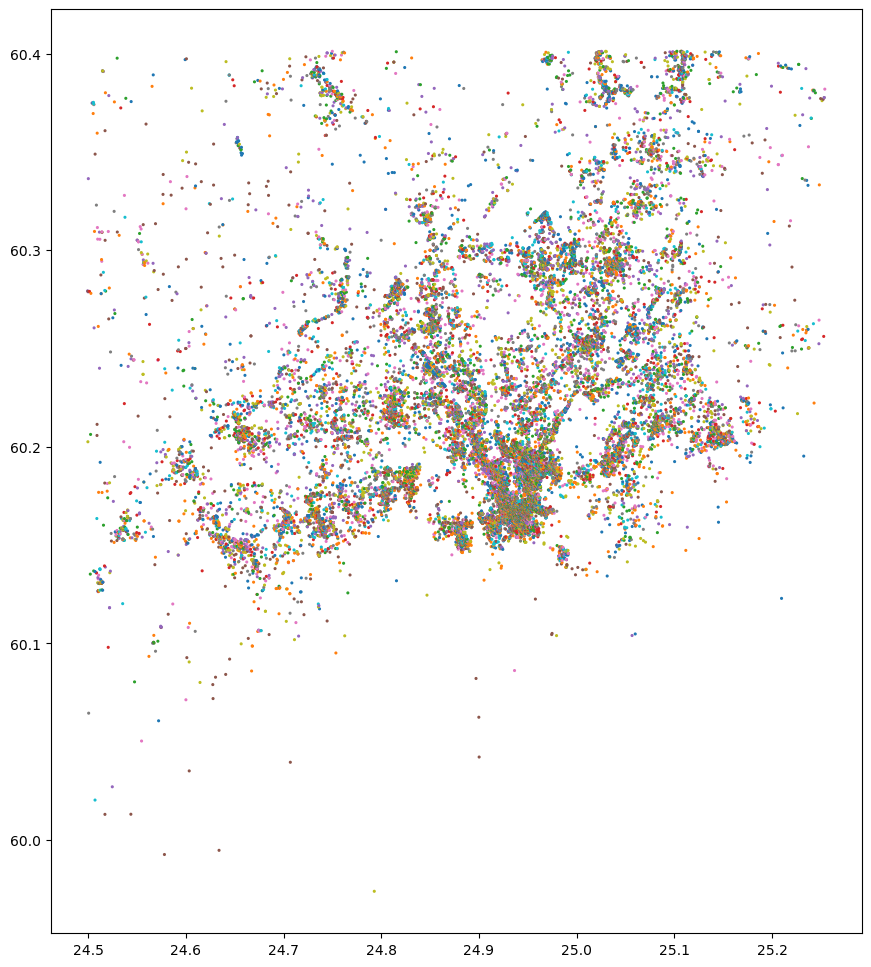

In [53]:
# Plot all POIs
gdf.plot(column="main_category", markersize=1.5, figsize=(12,12))

As we can see, there are thousands of POIs present in the data. In the following, we can count which categories are the most common ones in our data:

In [24]:
# Check how many POIs exist per category
gdf["main_category"].value_counts()

main_category
beauty_salon                        1682
community_services_non_profits      1208
professional_services               1191
park                                 924
landmark_and_historical_building     784
                                    ... 
football_stadium                       1
portuguese_restaurant                  1
african_restaurant                     1
cleaning_products_supplier             1
specialty_foods                        1
Name: count, Length: 963, dtype: int64

In [57]:
# To check all available categories, uncomment and run this
# gdf["main_category"].unique()

Finally, we can filter the data for specific categories that might be interesting for us. In the following, we filter data for libraries, hospitals and supermarkets that we can use later in our analyses:

In [66]:
# Select only specific services
libraries = gdf.loc[gdf["main_category"] == "library"].copy()
hospitals = gdf.loc[gdf["main_category"] == "hospital"].copy()
supermarkets = gdf.loc[gdf["main_category"] == "supermarket"].copy()
high_schools = gdf.loc[gdf["main_category"] == "high_school"].copy()

Now we have stored specific services into separate GeoDataFrames and we can plot them to see how they are distributed in the Helsinki Region:

<Axes: >

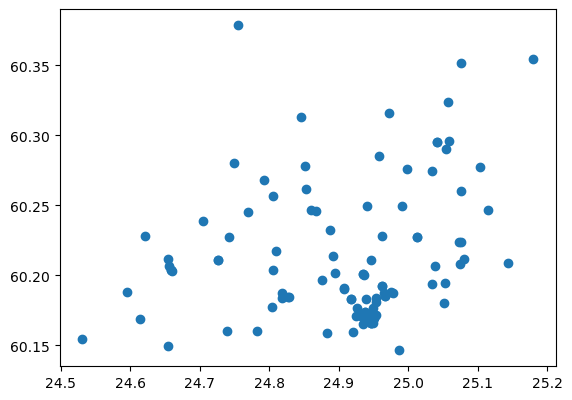

In [26]:
libraries.plot()

<Axes: >

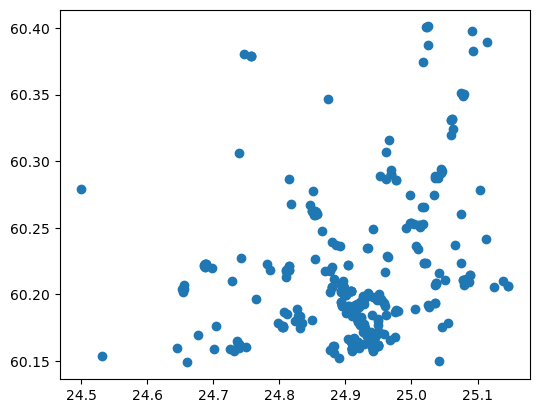

In [27]:
hospital.plot()

<Axes: >

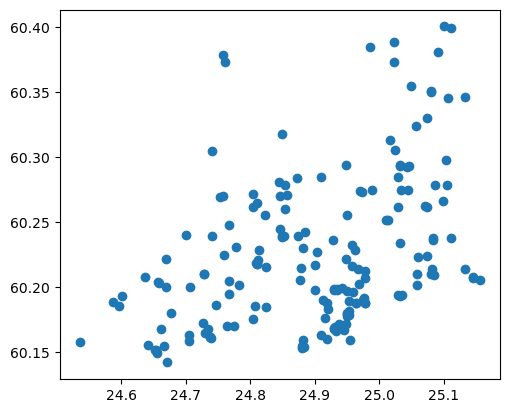

In [28]:
supermarket.plot()

<Axes: >

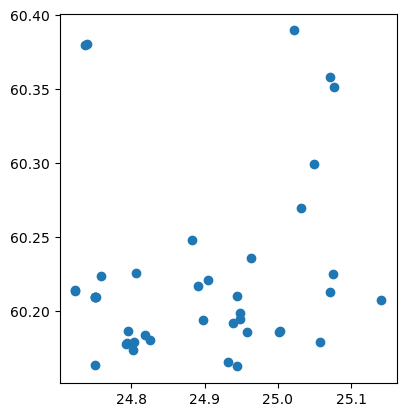

In [67]:
high_schools.plot()

## Pre-calculated datasets

For this workshop, we have prepared various datasets that are stored into `workshop_data` folder. The folder pre-calculated matrices for car and public transport including information about:

- How many users travel between specific places (based on mobile phone data)
   - Column: `EXTRAPOLATED_NUMBER_OF_USERS`
     
- The travel time for travelling between these locations by a given transport mode
   - Column: `Car_Travel_Time_minutes`, and
   - Column: `PT_Travel_Time_minutes`
     
- The GHG emissions for a single person travelling between these locations for a given transport mode
   - Column: `Single_CarTrip_Co2`, and
   - Column: `Single_PT_Trip_Co2`
      
- The total sum of emissions considering that all users would travel between specific places with a specific transport mode
   - Column: `Agg_CarTrip_Co2`, and
   - Column: `Agg_PT_Trip_Co2`

In the below, we demonstrate how the pre-calculated data looks like:

In [127]:
import pandas as pd

# File paths
car_fp = "workshop_data/matrices/Car_trips_Helsinki.csv"
pt_fp = "workshop_data/matrices/Transit_trips_Helsinki.csv"

In [128]:
# Read information about car trips
car_trips = pd.read_csv(car_fp)
car_trips.head()

,origin_code_level_9,destination_code_level_9,NUMBER_OF_USERS,DWELL_TIME,EXTRAPOLATED_NUMBER_OF_USERS,NUMBER_OF_SIGNALS,EXTRAPOLATED_NUMBER_OF_SIGNALS,PROPORTION_OF_USERS,NAMEFIN,Single_CarTrip_Co2,Agg_CarTrip_Co2,Car_Travel_Time_minutes
0,89089961267ffff,890899695b3ffff,0.67,5.49,92.89,7.44,935.56,5.03,Helsinki,2335.92,75943.41,13.00
1,89089968003ffff,8908996800bffff,3.67,3.69,362.56,5.22,509.67,9.80,Helsinki,66.06,8382.21,0.85
2,89089968003ffff,8908996800fffff,0.67,2.01,71.00,0.89,92.22,1.01,Helsinki,35.69,886.99,0.46
3,89089968003ffff,8908996801bffff,0.67,2.67,79.11,1.22,154.11,4.02,Helsinki,130.82,3622.38,1.68
4,89089968003ffff,89089968063ffff,2.00,3.96,235.67,2.56,287.89,4.08,Helsinki,210.07,17327.18,2.70


In [129]:
# Read information about transit trips
transit_trips = pd.read_csv(pt_fp)
transit_trips.head()

,origin_code_level_9,destination_code_level_9,NUMBER_OF_USERS,DWELL_TIME,EXTRAPOLATED_NUMBER_OF_USERS,NUMBER_OF_SIGNALS,EXTRAPOLATED_NUMBER_OF_SIGNALS,PROPORTION_OF_USERS,NAMEFIN,Single_PT_Trip_Co2,Agg_PT_Trip_Co2,PT_Travel_Time_minutes
0,89089968bdbffff,890899612cbffff,1.22,2.11,115.78,4.33,409.44,5.03,Helsinki,427.37,11380.43,76.0
1,89089969503ffff,890899612cbffff,0.78,2.35,84.22,2.44,254.56,5.29,Helsinki,624.52,12097.62,76.0
2,8908996950bffff,890899612cbffff,0.67,2.17,62.00,1.67,154.78,1.10,Helsinki,514.48,7336.53,76.0
3,890899698c3ffff,890899612cbffff,0.89,5.21,90.44,3.56,354.33,12.70,Helsinki,872.00,18139.58,76.0
4,8908996800fffff,89089968003ffff,1.44,3.27,181.22,1.67,202.44,7.46,Helsinki,23.37,973.94,5.0


These matrices cover the data for the whole Helsinki Region where human activity has been observed based on mobile phone data during April-May 2023. You can combine this data e.g. with the OvertureMaps POI data to understand how people can travel to specific services and how many people on average travel to these given locations.

In [132]:
import geopandas 

# Read POI data
libraries = gpd.read_file("workshop_data/POIs/Helsinki_libraries.gpkg")
libraries.head()

,id,bbox,version,update_time,sources,names,categories,confidence,websites,socials,emails,phones,brand,addresses,main_category,geometry
0,08f089979c540d6e03884387347f4c9e,"{'xmin': 24.531015396118164, 'xmax': 24.531019...",0,2024-05-10T00:00:00.000Z,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'Masala Library', 'common': None, ...","{'main': 'library', 'alternate': array(['cafe'...",0.959385,['http://itfmasala.fi'],['https://www.facebook.com/509593566224338'],None,['+358929672137'],None,"[{'freeform': 'Sundsbergintie 1', 'locality': ...",library,POINT (24.53102 60.15436)
1,08f08997992ecaa9030b2bb0a94a4d62,"{'xmin': 24.59498405456543, 'xmax': 24.5949878...",0,2024-05-10T00:00:00.000Z,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'Kauklahti Library', 'common': Non...","{'main': 'library', 'alternate': array(['publi...",0.959385,['http://www.helmet.fi/kauklahdenkirjasto'],['https://www.facebook.com/188329867875289'],None,['+358981653778'],None,"[{'freeform': 'Hansakallio 2', 'locality': 'Es...",library,POINT (24.59498 60.18805)
2,08f08996b0118b9d03d23d77bd85d6fe,"{'xmin': 24.655099868774414, 'xmax': 24.655103...",0,2024-05-10T00:00:00.000Z,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'Lippulaiva Library', 'common': No...","{'main': 'library', 'alternate': array(['publi...",0.959385,['https://helmet.finna.fi/organisationinfo/hom...,['https://www.facebook.com/101640745094450'],None,['+358981635097'],None,"[{'freeform': 'Espoonlahdenkatu 8', 'locality'...",library,POINT (24.65510 60.14934)
3,08f089979b28dbb6037ca222777113bd,"{'xmin': 24.614763259887695, 'xmax': 24.614767...",0,2024-05-10T00:00:00.000Z,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'Saunalahti Library', 'common': No...","{'main': 'library', 'alternate': array(['publi...",0.959385,['http://www.helmet.fi/saunalahdenkirjasto'],['https://www.facebook.com/246785858757196'],None,['+358981684645'],None,"[{'freeform': 'Brinkinmäentie 1', 'locality': ...",library,POINT (24.61477 60.16872)
4,08f08996a389c9ae032ca429e8d1c7fc,"{'xmin': 24.65976905822754, 'xmax': 24.6597728...",0,2024-05-10T00:00:00.000Z,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'Espoon Kirjastoautot', 'common': ...","{'main': 'library', 'alternate': array(['arts_...",0.363008,['https://helmet.finna.fi/content/kirjastoauto...,['https://www.facebook.com/28567010728'],None,['+358981657619'],None,"[{'freeform': 'Valakuja 10a', 'locality': 'Esp...",library,POINT (24.65977 60.20299)


In [133]:
# Read Hexagons
hexagons = gpd.read_file("workshop_data/H3/h3_polygons_Helsinki.gpkg")
hexagons.head()

,ID,geometry
0,89089961267ffff,"POLYGON ((24.64072 60.23779, 24.64341 60.23711..."
1,89089968003ffff,"POLYGON ((24.72265 60.18912, 24.72533 60.18843..."
2,8908996800fffff,"POLYGON ((24.72778 60.18945, 24.73046 60.18876..."
3,8908996801bffff,"POLYGON ((24.72044 60.18640, 24.72312 60.18572..."
4,89089968063ffff,"POLYGON ((24.73583 60.18740, 24.73851 60.18671..."


In [134]:
# Find the hexagons under which the libraries belong to
library_hex = libraries.sjoin(hexagons, predicate="within")
library_hex.head()

,id,bbox,version,update_time,sources,names,categories,confidence,websites,socials,emails,phones,brand,addresses,main_category,geometry,index_right,ID
0,08f089979c540d6e03884387347f4c9e,"{'xmin': 24.531015396118164, 'xmax': 24.531019...",0,2024-05-10T00:00:00.000Z,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'Masala Library', 'common': None, ...","{'main': 'library', 'alternate': array(['cafe'...",0.959385,['http://itfmasala.fi'],['https://www.facebook.com/509593566224338'],None,['+358929672137'],None,"[{'freeform': 'Sundsbergintie 1', 'locality': ...",library,POINT (24.53102 60.15436),2534,89089979c57ffff
2,08f08996b0118b9d03d23d77bd85d6fe,"{'xmin': 24.655099868774414, 'xmax': 24.655103...",0,2024-05-10T00:00:00.000Z,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'Lippulaiva Library', 'common': No...","{'main': 'library', 'alternate': array(['publi...",0.959385,['https://helmet.finna.fi/organisationinfo/hom...,['https://www.facebook.com/101640745094450'],None,['+358981635097'],None,"[{'freeform': 'Espoonlahdenkatu 8', 'locality'...",library,POINT (24.65510 60.14934),2082,8908996b013ffff
3,08f089979b28dbb6037ca222777113bd,"{'xmin': 24.614763259887695, 'xmax': 24.614767...",0,2024-05-10T00:00:00.000Z,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'Saunalahti Library', 'common': No...","{'main': 'library', 'alternate': array(['publi...",0.959385,['http://www.helmet.fi/saunalahdenkirjasto'],['https://www.facebook.com/246785858757196'],None,['+358981684645'],None,"[{'freeform': 'Brinkinmäentie 1', 'locality': ...",library,POINT (24.61477 60.16872),799,89089979b2bffff
4,08f08996a389c9ae032ca429e8d1c7fc,"{'xmin': 24.65976905822754, 'xmax': 24.6597728...",0,2024-05-10T00:00:00.000Z,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'Espoon Kirjastoautot', 'common': ...","{'main': 'library', 'alternate': array(['arts_...",0.363008,['https://helmet.finna.fi/content/kirjastoauto...,['https://www.facebook.com/28567010728'],None,['+358981657619'],None,"[{'freeform': 'Valakuja 10a', 'locality': 'Esp...",library,POINT (24.65977 60.20299),401,8908996a38bffff
5,08f08996a3882ae403d03f3c59c781f0,"{'xmin': 24.65888023376465, 'xmax': 24.6588840...",0,2024-05-10T00:00:00.000Z,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'Entressen kirjasto', 'common': No...","{'main': 'library', 'alternate': array(['publi...",0.959385,['http://www.helmet.fi/entressenkirjasto'],['https://www.facebook.com/53625091742'],None,['+358981653776'],None,"[{'freeform': 'Siltakatu 11', 'locality': 'Esp...",library,POINT (24.65888 60.20364),401,8908996a38bffff


In [136]:
# Find all trips by car and associated mobility data to these libraries
library_trips = car_trips.merge(library_hex, 
                                left_on="destination_code_level_9",
                                right_on="ID")

library_trips.columns                              

Index(['origin_code_level_9', 'destination_code_level_9', 'NUMBER_OF_USERS',
       'DWELL_TIME', 'EXTRAPOLATED_NUMBER_OF_USERS', 'NUMBER_OF_SIGNALS',
       'EXTRAPOLATED_NUMBER_OF_SIGNALS', 'PROPORTION_OF_USERS', 'NAMEFIN',
       'Single_CarTrip_Co2', 'Agg_CarTrip_Co2', 'Car_Travel_Time_minutes',
       'id', 'bbox', 'version', 'update_time', 'sources', 'names',
       'categories', 'confidence', 'websites', 'socials', 'emails', 'phones',
       'brand', 'addresses', 'main_category', 'geometry', 'index_right', 'ID'],
      dtype='object')

In [153]:
# How many OD-pairs there are?
library_trips.shape

(636, 30)

In [154]:
# First rows (note: Not all columns are visible)
library_trips.head(5)

,origin_code_level_9,destination_code_level_9,NUMBER_OF_USERS,DWELL_TIME,EXTRAPOLATED_NUMBER_OF_USERS,NUMBER_OF_SIGNALS,EXTRAPOLATED_NUMBER_OF_SIGNALS,PROPORTION_OF_USERS,NAMEFIN,Single_CarTrip_Co2,...,websites,socials,emails,phones,brand,addresses,main_category,geometry,index_right,ID
0,89089968063ffff,891126d338bffff,0.78,2.35,75.56,1.67,164.89,2.78,Helsinki,2288.54,...,None,['https://www.facebook.com/327890987935991'],None,None,None,"[{'freeform': None, 'locality': 'Helsinki', 'p...",library,POINT (24.93738 60.16792),1813,891126d338bffff
1,8908996836fffff,891126d338bffff,1.78,2.20,211.44,3.11,359.33,3.26,Helsinki,1828.60,...,None,['https://www.facebook.com/327890987935991'],None,None,None,"[{'freeform': None, 'locality': 'Helsinki', 'p...",library,POINT (24.93738 60.16792),1813,891126d338bffff
2,890899691afffff,891126d338bffff,0.78,3.22,87.44,1.89,206.33,1.93,Helsinki,1611.93,...,None,['https://www.facebook.com/327890987935991'],None,None,None,"[{'freeform': None, 'locality': 'Helsinki', 'p...",library,POINT (24.93738 60.16792),1813,891126d338bffff
3,891126d0c03ffff,891126d338bffff,1.00,5.95,131.11,5.56,633.11,2.94,Helsinki,1876.20,...,None,['https://www.facebook.com/327890987935991'],None,None,None,"[{'freeform': None, 'locality': 'Helsinki', 'p...",library,POINT (24.93738 60.16792),1813,891126d338bffff
4,891126d1e37ffff,891126d338bffff,0.56,2.14,64.33,1.33,136.56,1.81,Helsinki,1538.29,...,None,['https://www.facebook.com/327890987935991'],None,None,None,"[{'freeform': None, 'locality': 'Helsinki', 'p...",library,POINT (24.93738 60.16792),1813,891126d338bffff


In [141]:
# Generate flows to the libraries
# -------------------------------

from shapely import Point, LineString

# Names of the hex columns
orig_hex = "origin_code_level_9"
dest_hex = 

library_flows = library_trips.copy()

# Extract the Hexagon centroids for origins and destinations
library_flows["origin_geom"] = library_flows[orig_hex].apply(lambda x: Point(list(h3.h3_to_geo(str(x)))[::-1]))
library_flows["destination_geom"] = library_flows[dest_hex].apply(lambda x: Point(list(h3.h3_to_geo(str(x)))[::-1]))

# Create a LineString geometry out of the points
library_flows["line_geom"] = library_flows.apply(lambda x: LineString([x["origin_geom"], x["destination_geom"]]), axis=1)

# Create a GeoDataFrame
library_flows = gpd.GeoDataFrame(library_flows, geometry="line_geom", crs="epsg:4326")

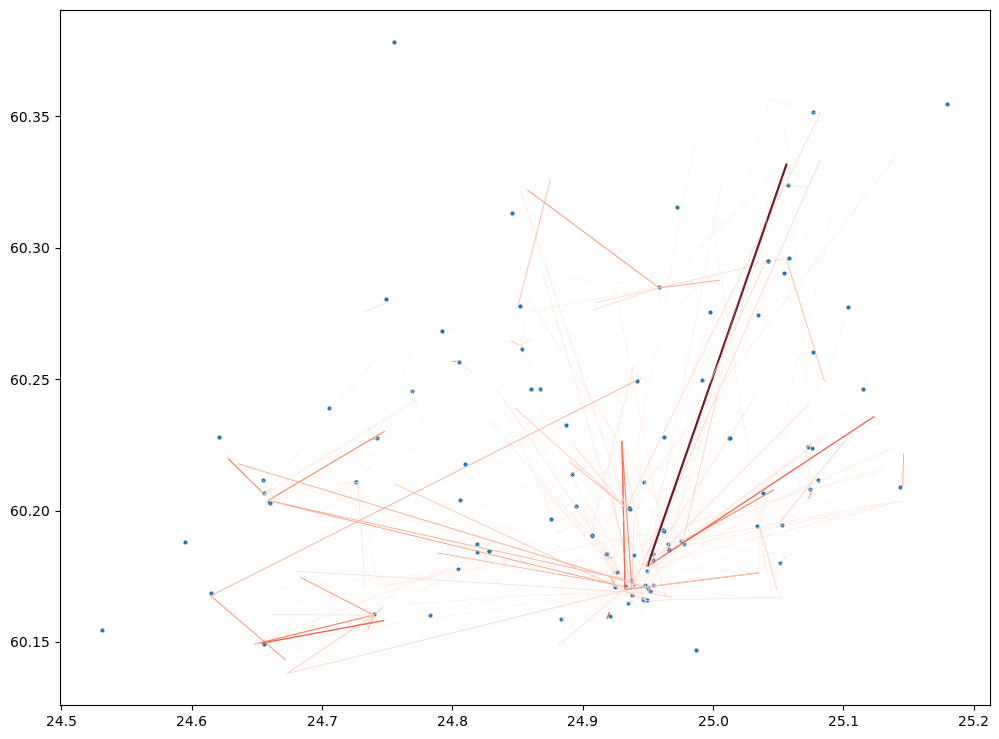

In [145]:
# Visualize the flows to hexagons where libraries are located
column = "EXTRAPOLATED_NUMBER_OF_USERS"

ax = library_flows.plot(column=column, cmap="Reds", linewidth=library_flows[column]/1000, alpha=0.9, figsize=(12,12))
ax = libraries.plot(ax=ax, markersize=4)

In a similar manner, you can combine the data and investigate the mobilities and associated travel times and GHG emissions to other Points of Interests, which are provided for you.

In case you are interested how these datasets were produced, take a look on:

- [Tutorial 1: Travel time and carbon emission quantification for car-based trips](https://mobitartu24.readthedocs.io/en/develop/notebooks/T1_spatial_network_analysis_SingleOD.html)
- [Tutorial 2: Travel time and carbon emission quantification for transit based trips](https://mobitartu24.readthedocs.io/en/develop/notebooks/T2_calculating-travel-time-matrices_and_GHG_factors.html)

Also, in case you would be interested to know how to calculate travel time matrices for larger areas, you can take a look on following tutorial (out of scope for this workshop):

- [Spatial Accessibility Modelling with r5py](https://sumogis.readthedocs.io/en/latest/lessons/L2/r5py_demo.html)